In [93]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [94]:
from Twitter.analysis_v2.data_prediction_ml import get_test_train_data
from Twitter.analysis_v2.data_prediction_ml import prepare_model_data
from Twitter.analysis_v2.data_prediction_ml import split_data
from Twitter.analysis_v2.data_prediction_ml import compare_base_models
from Twitter.analysis_v2.data_prediction_ml import find_best_params
from Twitter.analysis_v2.data_prediction_ml import train_evaluate_save
from Twitter.analysis_v2.data_prediction_ml import tree_analysis
from Twitter.analysis_v2.data_prediction_ml import anova_analysis
from Twitter.analysis_v2.data_prediction_ml import chi_analysis
from Twitter.analysis_v2.data_prediction_ml import lasso_analysis
from Twitter.analysis_v2.data_prediction_ml import rfe_analysis
from Twitter.analysis_v2.data_prediction_ml import algorithm_comparison_chart

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

In [96]:
BASE_FOLDER = "../../data/processed_tweets/"

num_vars = ['followers', 'following', 'tweet_count', 'seniority']
cat_vars = ['topics', 'sentiment', 'hashtags', 'verified', 'day_phase', 'day_of_week', 'month']
cat_vars_enc = ['topics_ids', 'sentiment_enc', 'hashtags_enc', 'verified_enc', 'day_phase_enc', 'day_of_week_enc', 'month_enc']

variables_to_predict = ['followers', 'following', 'tweet_count', 'seniority', 'verified_enc', 'day_phase_enc', 'day_of_week_enc', 'month_enc', 'topics_ids', 'sentiment_enc', 'hashtags_enc']

In [97]:
train_df, test_df = get_test_train_data(False)

['tweets_2019.csv', 'tweets_2020.csv', 'tweets_2021.csv']


In [98]:
train_df = prepare_model_data(train_df)
test_df = prepare_model_data(test_df)

In [99]:
X_train, y_train, X_test, y_test = split_data(train_df, test_df)

(383207, 72)
(383207,)
(174108, 72)
(174108,)


In [100]:
def get_encoded_cols():
    encoded_cols = []
    for cat in cat_vars:
        content = [x for x in X_train.columns[X_train.columns.str.startswith(cat)].tolist() if (x not in cat_vars_enc) and (x not in cat_vars) and (x != 'topics_cleaned')]
        encoded_cols += content
    print(len(encoded_cols), "encoded cols found")
    return encoded_cols

In [101]:
cat_vars_encoded = get_encoded_cols()

38 encoded cols found


In [102]:
for cat in cat_vars_encoded:
    X_train[cat] = X_train[cat].fillna(0)

## Standardization

In [103]:
X_train_cats = X_train[cat_vars_encoded]
scaler = StandardScaler().fit(X_train[num_vars])
X_train_num_scaled = scaler.transform(X_train[num_vars])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train[num_vars].columns).set_index(X_train.index)

X_test_num_scaled = scaler.transform(X_test[num_vars])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test[num_vars].columns).set_index(X_test.index)

## Feature Selection

In [104]:
num_feat_to_keep = pd.DataFrame(index=X_train_cats.columns)
cat_feat_to_keep = pd.DataFrame(index=X_train_num_scaled.columns)

### Categorical variables selection

#### Chi-square

In [105]:
chi_analysis(cat_feat_to_keep, X_train_cats, y_train)

Chi-square analysis


### Numerical variables selection

#### ANOVA

In [106]:
anova_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

ANOVA analysis


#### Tree-based

In [107]:
tree_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Tree based analysis


#### LASSO Regression

In [108]:
lasso_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Lasso analysis


#### Recursive Feature Elimination

In [109]:
rfe_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Recursive feature extraction analysis


### Final variables

In [110]:
num_feat_to_keep['Discard Nr'] = num_feat_to_keep.apply(lambda x: x.str.findall('Discard').str.len()).sum(axis = 1).astype(int)
num_feat_to_keep

,ANOVA,Trees,Lasso Regression,RFE,Discard Nr
topics_cleaned_Brand,Discard,Discard,Discard,Discard,4
topics_cleaned_Entities,Discard,Discard,Discard,Discard,4
topics_cleaned_Holiday,Discard,Discard,Discard,Discard,4
topics_cleaned_Interest and Hobbies,Discard,Discard,Discard,Discard,4
topics_cleaned_Music,Discard,Discard,Discard,Discard,4
topics_cleaned_Other,Discard,Discard,Discard,Discard,4
topics_cleaned_Person,Discard,Discard,Discard,Discard,4
topics_cleaned_Political,Discard,Discard,Discard,Discard,4
topics_cleaned_Sport,Discard,Discard,Discard,Discard,4
topics_cleaned_TV and Movies,Discard,Discard,Discard,Discard,4


In [111]:
cat_feat_to_keep['Discard Nr'] = cat_feat_to_keep.apply(lambda x: x.str.findall('Discard').str.len()).sum(axis = 1).astype(int)
cat_feat_to_keep

,Chi2,Discard Nr
followers,Discard,1
following,Discard,1
tweet_count,Discard,1
seniority,Discard,1
topics_cleaned_Sport,Keep,0
sentiment_Neutral,Keep,0
sentiment_Positive,Keep,0
hashtags_True,Keep,0
verified_True,Keep,0
day_phase_Morning,Keep,0


In [112]:
cat_to_keep = cat_feat_to_keep[cat_feat_to_keep['Discard Nr'] < 1].index.tolist()
num_to_keep = num_feat_to_keep[num_feat_to_keep['Discard Nr'] < 3].index.to_list()
print(cat_to_keep + num_to_keep)

['topics_cleaned_Sport', 'sentiment_Neutral', 'sentiment_Positive', 'hashtags_True', 'verified_True', 'day_phase_Morning', 'followers', 'following', 'seniority', 'tweet_count']


In [113]:
X_train = X_train[cat_to_keep].copy()
X_train[num_to_keep] = X_train_num_scaled[num_to_keep]

In [114]:
X_test = X_test[cat_to_keep].copy()
X_test[num_to_keep] = X_test_num_scaled[num_to_keep]

## Balacing the dataset

### SMOTE Method

In [115]:
print("Before over sampling: ", Counter(y_train))
over_sample = SMOTE(random_state=7)
X_train, y_train = over_sample.fit_resample(X_train, y_train)
print("After over sampling: ", Counter(y_train))

Before over sampling:  Counter({0: 322530, 1: 60677})
After over sampling:  Counter({1: 322530, 0: 322530})


## Models

LR: 0.343517 (0.114059)
LDA: 0.296067 (0.093531)
CART: 0.632261 (0.033863)
NB: 0.568958 (0.281192)
AB: 0.484470 (0.075111)
GBM: 0.490260 (0.058543)
RFC: 0.704820 (0.029343)
ET: 0.735851 (0.031040)


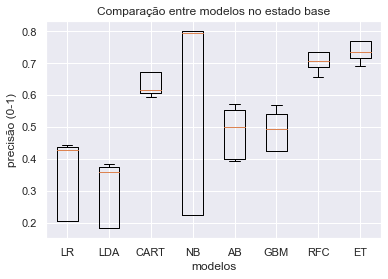

<Figure size 1800x1296 with 0 Axes>

In [117]:
models = [('LR', LogisticRegression(solver='lbfgs')), ('LDA', LinearDiscriminantAnalysis()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('AB', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RFC', RandomForestClassifier(n_estimators=100)), ('ET', ExtraTreesClassifier())]
num_folds = 5
seed = 7
scoring = 'accuracy'
best_base_model, names, results = compare_base_models(models, X_train, y_train, scoring, num_folds)
algorithm_comparison_chart('Comparação dos modelos base', 'modelos', 'precisão (0-1)', names, results, False)

## Hyperparameter Optimization

In [38]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 400]
}
best_params = find_best_params(best_base_model[1], param_grid, X_train, y_train)
best_params

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best: 0.684668 using {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [39]:
optimized_model = ExtraTreesClassifier(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'], max_features=best_params['max_features'],
                       min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators'])

In [60]:
optimized_model_fixed = ExtraTreesClassifier(bootstrap=True, max_depth=110, max_features=3,
                       min_samples_leaf=3, min_samples_split=8, n_estimators=200)

## Test final model

In [61]:
train_evaluate_save(optimized_model, X_train, y_train, X_test, y_test)

Model Performance
Accuracy: 0.75%


0.7528143451191215